# THE ULTIMATE HALLOWEEN CANDY POWER RANKING
 

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [EDA](#section4)
    - 4.1 [Distributions and test against normality assumption](#section401)<br/>
    - 4.2 [Establishing coorelation between all the features using heatmap](#section402)<br/>
    - 4.3 [Checking each ingredients/features](#section403)<br/>
    - 4.4 [Most Popular and Least Popular Candies](#section404)<br/>
    - 4.5 [Identifying the Components that make a Good Candy](#section405)<br/>
    - 4.6 [Feature Importance of Various Attributes](#section406)<br/>
5. [Spilting in train and test datasets.](#section5)
6. [Linear Regression](#section6)
7. [Decision Tree Regressor](#section7)
8. [Random Forest Regressor](#section8)
9. [Model evaluation](#section9)
    - 9.1 [Root Mean Square Error](#section901)<br/>
    - 9.2 [R-squared and Adjusted R-squared](#section902)<br/>
    - 9.3 [Mean Absolute Error](#section903)<br/>
    - 9.4 [Mean Squared Error](#section904)<br/>
10. [conclusions](#section10)
    

<a id='section1'></a>
### 1. Problem Statement
> The goal is to create a model using the provided predictor variables for predicting of the overall win percent of candy and evaluate the model using possible model evaluation techniques.

<a id='section2'></a>
### 2. Data Loading and Description
>What’s the best (or at least the most popular) Halloween candy? That was the question this dataset was collected to answer. Data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive. In total, more than 269 thousand votes were collected from 8,371 different IP addresses.
>The dataset comprises of 85 rows and 13 columns.
>For binary variables, 1 means yes, 0 means no. The data contains the following fields:

|Feature||Description|
|-------||-----------|
|chocolate|	|Does it contain chocolate?|
|fruity|	|Is it fruit flavored?|
|caramel|	|Is there caramel in the candy?|
|peanutalmondy:||	Does it contain peanuts, peanut butter or almonds?|
|nougat|	|Does it contain nougat?|
|crispedricewafer||	Does it contain crisped rice, wafers, or a cookie component?|
|hard||	Is it a hard candy?|
|bar||	Is it a candy bar?|
|pluribus||	Is it one of many candies in a bag or box?|
|sugarpercent||	The percentile of sugar it falls under within the data set.|
|pricepercent||	The unit price percentile compared to the rest of the set.|
|winpercent||	The overall win percentage according to 269,000 matchups.|

### Importing packages

In [ ]:
!pip install mlxtend 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


     |████████████████████████████████| 1.3MB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 63kB/s  eta 0:00:01
     |████████████████████████████████| 26.1MB 30kB/s  eta 0:00:01
ERROR: scikit-image 0.16.2 has requirement matplotlib!=3.0.0,>=2.0.0, but you'll have matplotlib 3.0.0 which is incompatible.
ERROR: azureml-train-automl-runtime 1.0.76.1 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-train-automl-runtime 1.0.76.1 has requirement pandas<=0.23.4,>=0.21.0, but you'll have pandas 0.25.3 which is incompatible.
ERROR: azureml-train-automl-runtime 1.0.76.1 has requirement scipy<=1.1.0,>=1.0.0, but you'll have scipy 1.4.1 which is incompatible.
ERROR: azureml-opendatasets 1.0.76 has requirement pandas<=0.23.4,>=0.21.0, but you'll have pandas 0.25.3 which is incompatible.
ERROR: azureml-opendatasets 1.0.76 has requirement scipy<=1.1.0,>=1.0.0, but you'll have scipy 1.4.1 which is incompatible.
ERROR: azu

#### Importing the Dataset

In [ ]:
candy_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<a id='section3'></a>
### 3. Preprocessing

#### Check the shape of the dataset

In [ ]:
candy_data.shape

(85, 13)

#### Check the columns present in the dataset

In [ ]:
candy_data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

#### Check the descriptive statistics of the dataset

In [ ]:
candy_data.describe(include='all')

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Charleston Chew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,NaN,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998


### Round upto 3 decimals for the columns sugarpercent, pricepercent and winpercent.

In [ ]:
candy_data.sugarpercent = round(candy_data.sugarpercent,3)
candy_data.pricepercent = round(candy_data.pricepercent,3)
candy_data.winpercent = round(candy_data.winpercent,3)

In [ ]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.972
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.603
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.117
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341


#### Check the info of the dataset

In [ ]:
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


#### Check the missing values present in the dataset.

In [ ]:
candy_data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

<a id='section401'></a>
### 4.1 Distributions and test against normality assumption
>Testing if the continous variables follow a standard distribution and make some visualizations to explore the data

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


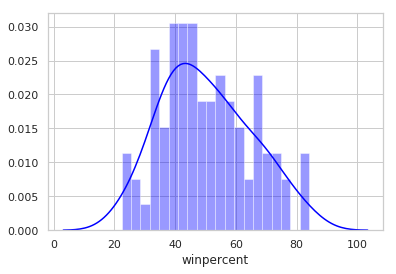

In [ ]:
sns.distplot(candy_data ['winpercent'], bins=20, color = 'blue')

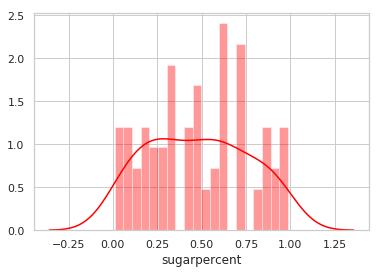

In [ ]:
sns.distplot(candy_data['sugarpercent'], bins=20, color = 'red')

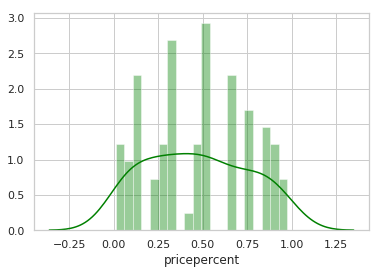

In [ ]:
sns.distplot(candy_data['pricepercent'], bins=20, color = 'green')

<a id='section402'></a>
### 4.2 Establishing coorelation between all the features using heatmap.

Text(0.5, 1.0, 'Correlation between features')

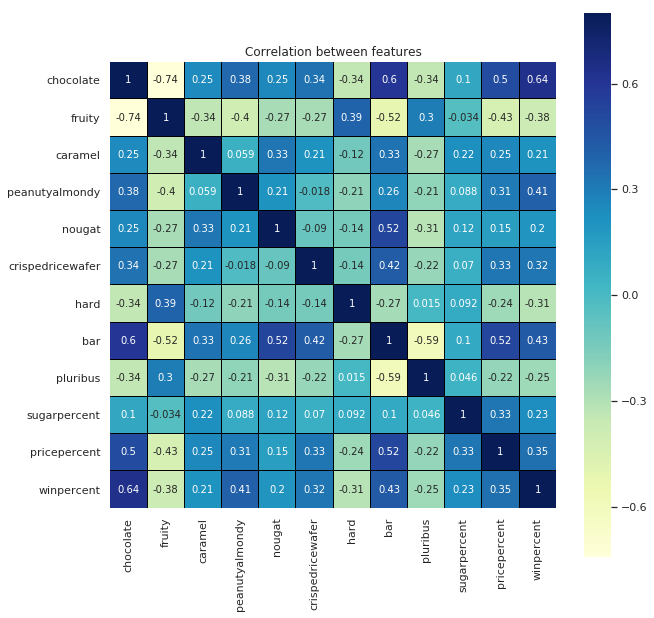

In [ ]:
corr = candy_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

HeatMap above shows:

- Makers do not mix chocolate and fruits most of the time.
- Candies which are shaped as bar generally has chocolate and/or nougat and they are least likely to be in a bag and have fruits.
- Chocolate means win (mostly).
- Sugar doesn't have a considerable effect on winning.

<a id='section403'></a>
### 4.3 Checking each ingredients/features

In [ ]:
winners = candy_data[candy_data.winpercent>candy_data.winpercent.quantile(.6)]

#### Univariate analysis

#### Chocolate

([<matplotlib.patches.Wedge at 0x7ff6804eacf8>,
 [Text(-0.877818913499439, 0.6628981483626764, "Doesn't have Chocolate"),
  Text(0.877818882466936, -0.6628981894563447, 'Does have Chocolate')],
 [Text(-0.4788103164542393, 0.3615808081978234, '79.4%'),
  Text(0.47881029952741955, -0.3615808306125516, '20.6%')])

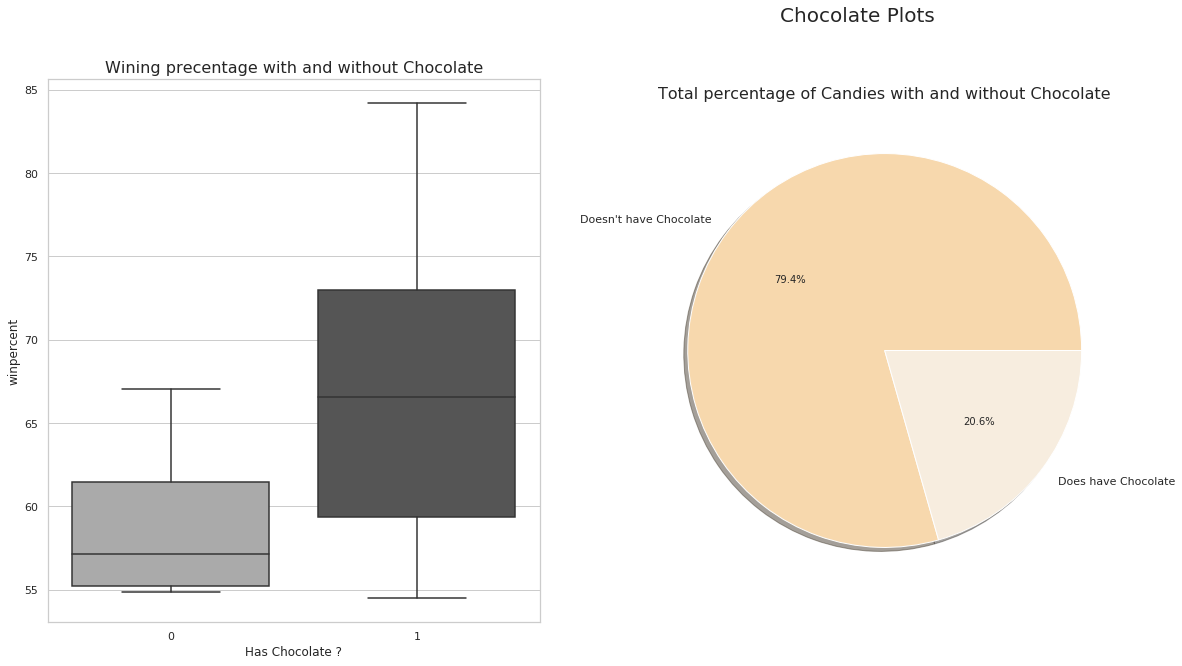

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle("Chocolate Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Chocolate",fontsize=16)
sns.boxplot(data=winners,x="chocolate",y="winpercent",color="brown",palette="gray_r")
plt.xlabel("Has Chocolate ?")

plt.subplot(1,3,2)
plt.title("Total percentage of Candies with and without Chocolate",fontsize=16)
plt.pie(winners.chocolate.value_counts(), autopct='%1.1f%%',colors=["#F7D8AD","#F7EDDF"],labels=["Doesn't have Chocolate","Does have Chocolate"],shadow=True)

Observations from graphs above:

Chocolate is an important parameter for win (nothing without chocolate has more than 80 as a winning score).

Almost half of all candies has chocolate.

#### Fruits

([<matplotlib.patches.Wedge at 0x7ff6800469e8>,
 [Text(-0.877818913499439, 0.6628981483626764, "Doesn't have fruity"),
  Text(0.877818882466936, -0.6628981894563447, 'Does have fruity')],
 [Text(-0.4788103164542393, 0.3615808081978234, '79.4%'),
  Text(0.47881029952741955, -0.3615808306125516, '20.6%')])

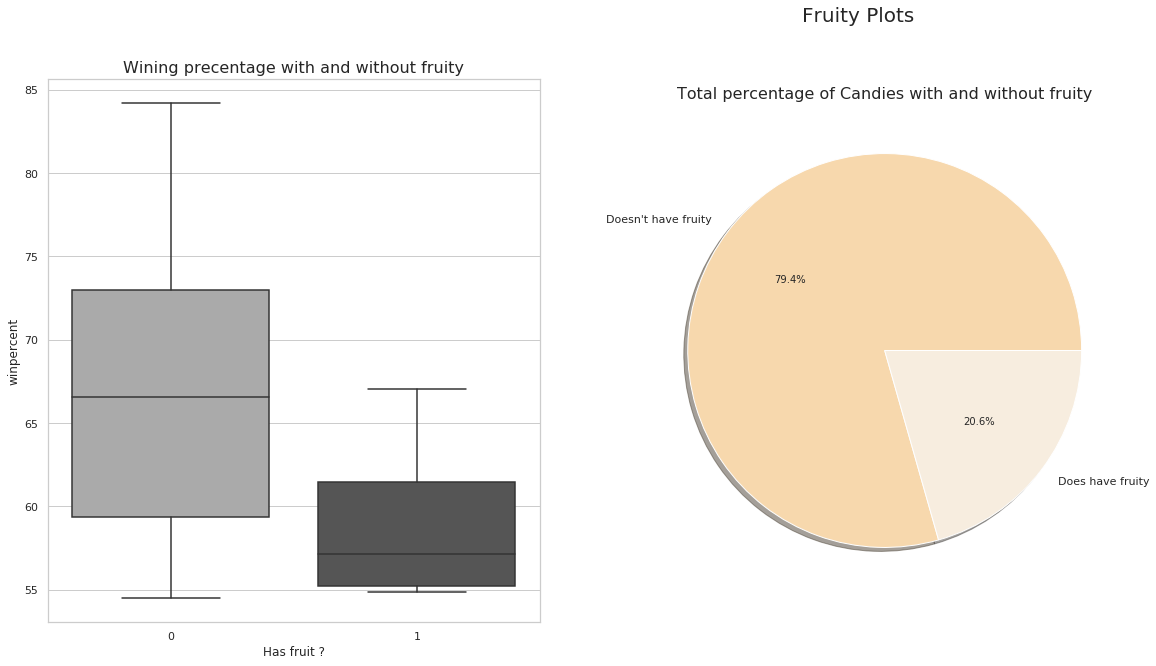

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle("Fruity Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without fruity",fontsize=16)
sns.boxplot(data=winners,x="fruity",y="winpercent",color="brown",palette="gray_r")
plt.xlabel("Has fruit ?")

plt.subplot(1,3,2)
plt.title("Total percentage of Candies with and without fruity",fontsize=16)
plt.pie(winners.fruity.value_counts(), autopct='%1.1f%%',colors=["#F7D8AD","#F7EDDF"],labels=["Doesn't have fruity","Does have fruity"],shadow=True)

Observations:
Fruits are not  very good for winning. Best score from fruity candy is close to 70, and mean score around 50s.
It is not very common to use Fruits(20.6%).

#### Caramel

([<matplotlib.patches.Wedge at 0x7ff67fdb75c0>,
 [Text(-0.6628981483626761, 0.8778189134994391, "Doesn't have caramel"),
  Text(0.6628982305500108, -0.8778188514344317, 'Does have caramel')],
 [Text(-0.36158080819782334, 0.47881031645423944, '70.6%'),
  Text(0.3615808530272786, -0.47881028260059905, '29.4%')])

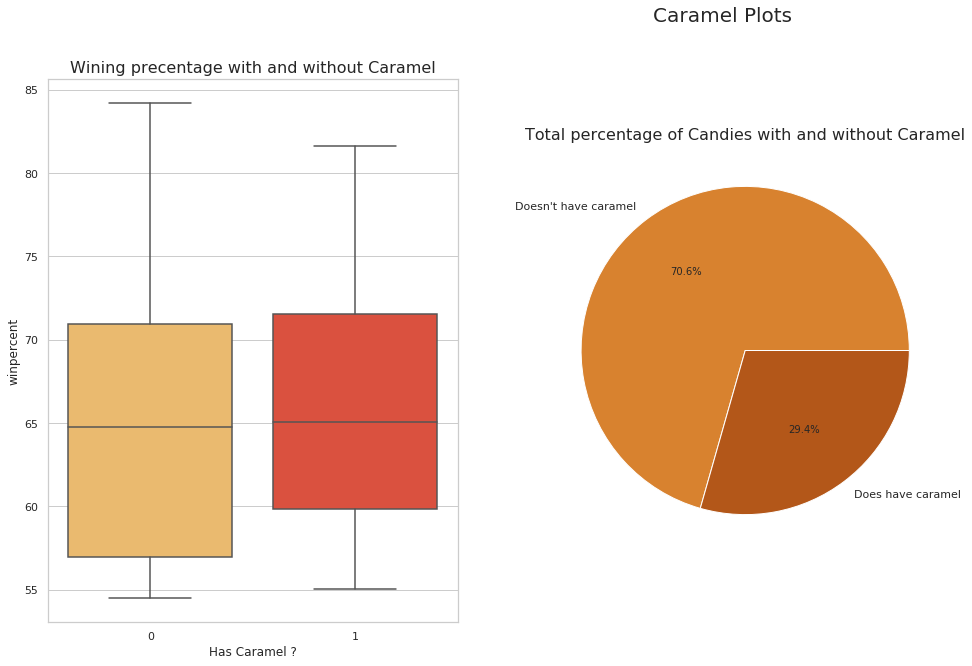

In [ ]:
plt.figure(figsize=(25,10))

plt.suptitle("Caramel Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Caramel",fontsize=16)
sns.boxplot(data=winners,x="caramel",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Caramel ?")

plt.subplot(1,3,2)
plt.title("Total percentage of Candies with and without Caramel",fontsize=16)
plt.pie(winners.caramel.value_counts(), autopct='%1.1f%%',colors=["#D8822F","#B35719"],labels=["Doesn't have caramel","Does have caramel"])

Observations:
You don't really need to have caramel but it does have a slight effect on winning.
It is more common to use caramel in candies compared to fruits (only 29.4% uses it).

#### Peanut & almond

([<matplotlib.patches.Wedge at 0x7ff67fcd3be0>,
 [Text(-0.5790753482603684, 0.9352388684379693, "Doesn't have peanut/almond"),
  Text(0.5790753482603688, -0.935238868437969, 'Does have peanut/almond')],
 [Text(-0.3158592808692919, 0.5101302918752559, '67.6%'),
  Text(0.315859280869292, -0.5101302918752558, '32.4%')])

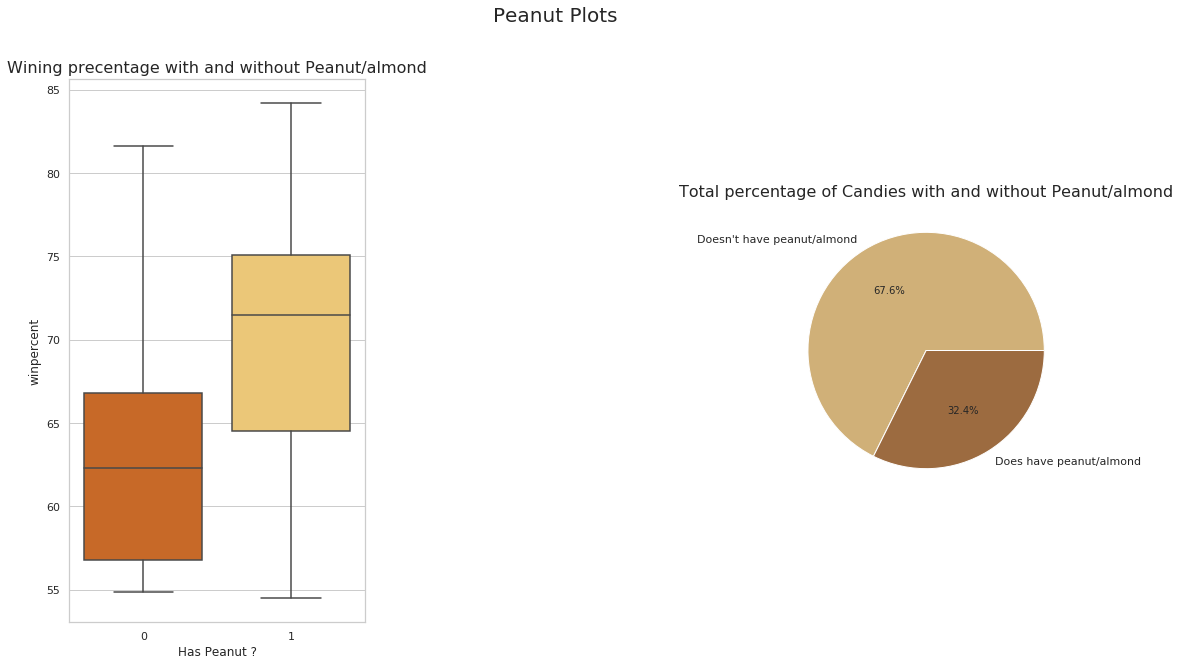

In [ ]:
plt.figure(figsize=(18,10))
plt.suptitle("Peanut Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Peanut/almond",fontsize=16)
sns.boxplot(data=winners,x="peanutyalmondy",y="winpercent",palette="YlOrBr_r")
plt.xlabel("Has Peanut ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Peanut/almond",fontsize=16)
plt.pie(winners.peanutyalmondy.value_counts(), autopct='%1.1f%%',colors=["#D0B078","#9C6B40"],labels=["Doesn't have peanut/almond","Does have peanut/almond"])

Observations:
Peanut is also an important parameter of Winning (like chocolate)
It is also more common than caramel (32.4%)


#### Nougat

([<matplotlib.patches.Wedge at 0x7ff67fc513c8>,
 [Text(-0.9846795880860908, 0.490312256431151, "Doesn't have Nougat"),
  Text(0.9846795651329167, -0.49031230252732844, 'Does have Nougat')],
 [Text(-0.5370979571378677, 0.267443048962446, '85.3%'),
  Text(0.5370979446179545, -0.26744307410581547, '14.7%')])

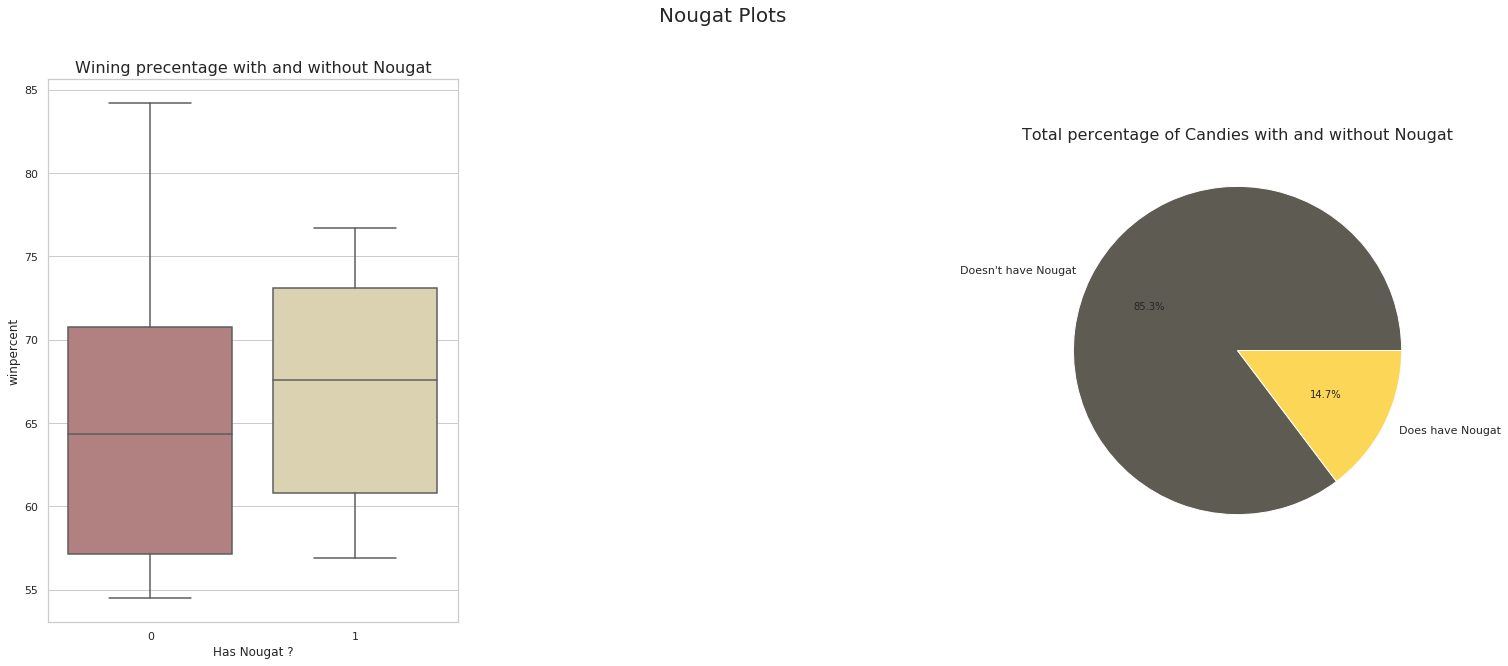

In [ ]:
plt.figure(figsize=(25,10))

plt.suptitle("Nougat Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Nougat",fontsize=16)
sns.boxplot(data=winners,x="nougat",y="winpercent",palette="pink")
plt.xlabel("Has Nougat ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Nougat",fontsize=16)
plt.pie(winners.nougat.value_counts(), autopct='%1.1f%%',colors=["#5e5b52","#fcd757"],labels=["Doesn't have Nougat","Does have Nougat"])

Observations:
It has small effect on winning.
Not popular in the Candy business too.


#### Crisped Rice or Wafer

([<matplotlib.patches.Wedge at 0x7ff67f9b0a20>,
 [Text(-0.9352388684379692, 0.5790753482603685, "Doesn't have \nCrisped Rice or Wafer"),
  Text(0.9352388955464416, -0.5790753044786769, 'Does have \nCrisped Rice or Wafer')],
 [Text(-0.5101302918752558, 0.31585928086929194, '82.4%'),
  Text(0.5101303066616953, -0.3158592569883692, '17.6%')])

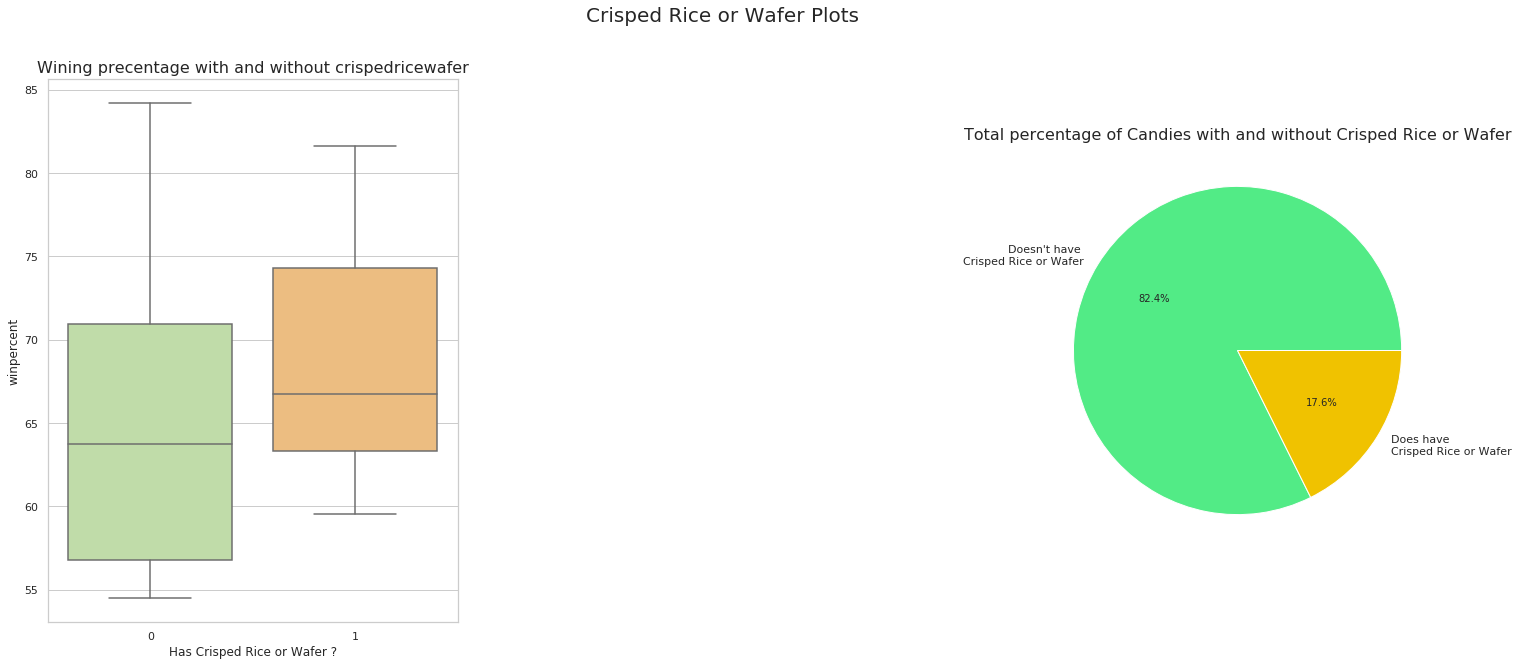

In [ ]:
plt.figure(figsize=(25,10))

plt.suptitle("Crisped Rice or Wafer Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without crispedricewafer",fontsize=16)
sns.boxplot(data=winners,x="crispedricewafer",y="winpercent",palette="Spectral_r")
plt.xlabel("Has Crisped Rice or Wafer ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Crisped Rice or Wafer",fontsize=16)
plt.pie(winners.crispedricewafer.value_counts(), autopct='%1.1f%%',colors=["#52eb86","#f0c200"],labels=["Doesn't have \nCrisped Rice or Wafer","Does have \nCrisped Rice or Wafer"])

Observations:
It has considerably good effect on winning. Minimun score is close to 60, which is a good sign
Not so popular in the Candy business too.(17.6%)

#### Hardness

([<matplotlib.patches.Wedge at 0x7ff67f8d7240>,
 [Text(-1.095307584980848, 0.10149529192737142, "Doesn't have hardness"),
  Text(1.095307576072086, -0.10149538806808751, 'Does have hardness')],
 [Text(-0.5974405008986443, 0.05536106832402077, '97.1%'),
  Text(0.5974404960393196, -0.05536112076441137, '2.9%')])

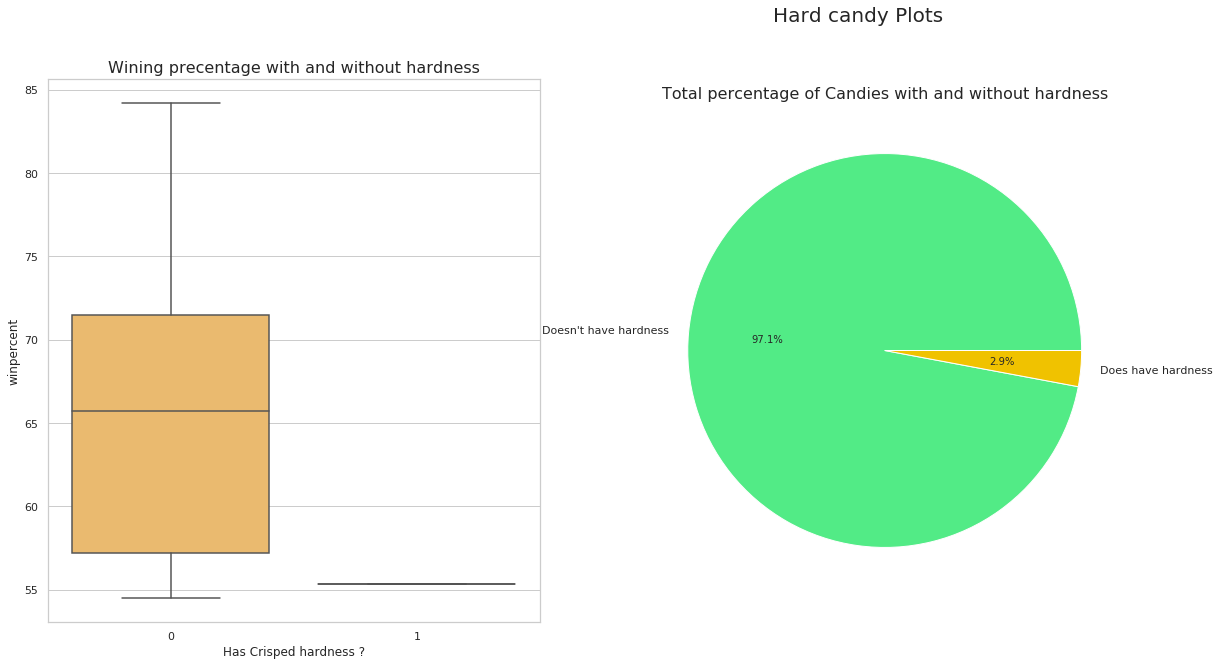

In [ ]:
plt.figure(figsize=(30,10))

plt.suptitle("Hard candy Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without hardness",fontsize=16)
sns.boxplot(data=winners,x="hard",y="winpercent",palette="YlOrRd")
plt.xlabel("Has Crisped hardness ?")

plt.subplot(1,3,2)
plt.title("Total percentage of Candies with and without hardness",fontsize=16)
plt.pie(winners.hard.value_counts(), autopct='%1.1f%%',colors=["#52eb86","#f0c200"],labels=["Doesn't have hardness","Does have hardness"])

Observations:
From the above plot we can say that more than 60% of the population likes Soft Candies so it might be important parameter.
Not popular in the candy business (only 2.9%).

#### Bar

([<matplotlib.patches.Wedge at 0x7ff67f8708d0>,
 [Text(-0.10149529192737097, 1.095307584980848, 'Not bar'),
  Text(0.10149539447746775, -1.0953075754781683, 'Bar')],
 [Text(-0.055361068324020525, 0.5974405008986443, '52.9%'),
  Text(0.055361124260436954, -0.5974404957153645, '47.1%')])

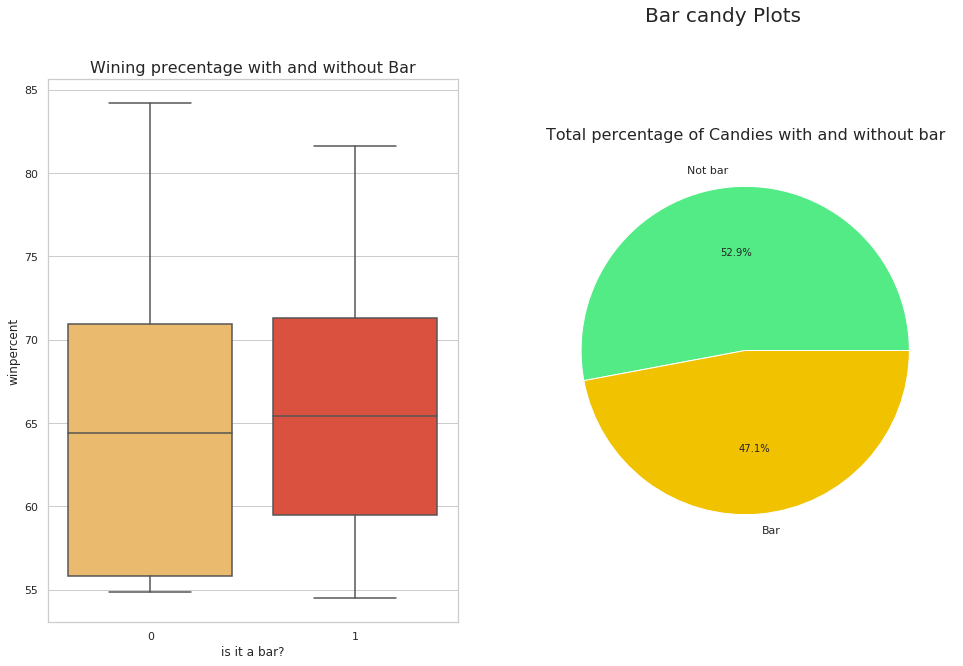

In [ ]:
plt.figure(figsize=(25,10))

plt.suptitle("Bar candy Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Bar",fontsize=16)
sns.boxplot(data=winners,x="bar",y="winpercent",palette="YlOrRd")
plt.xlabel("is it a bar?")

plt.subplot(1,3,2)
plt.title("Total percentage of Candies with and without bar",fontsize=16)
plt.pie(winners.bar.value_counts(), autopct='%1.1f%%',colors=["#52eb86","#f0c200"],labels=["Not bar","Bar"])

Observations:
From the above plot we can say that more than 60% of the population likes Bar.
Almost half of all the candies are bar (47.1%).

#### Pluribus

([<matplotlib.patches.Wedge at 0x7ff67f54aa20>,
 [Text(-0.2021244576881282, 1.0812704118786753, 'Not Pluribus'),
  Text(0.20212445768812856, -1.0812704118786753, 'Pluribus')],
 [Text(-0.11024970419352446, 0.589783861024732, '55.9%'),
  Text(0.11024970419352466, -0.5897838610247319, '44.1%')])

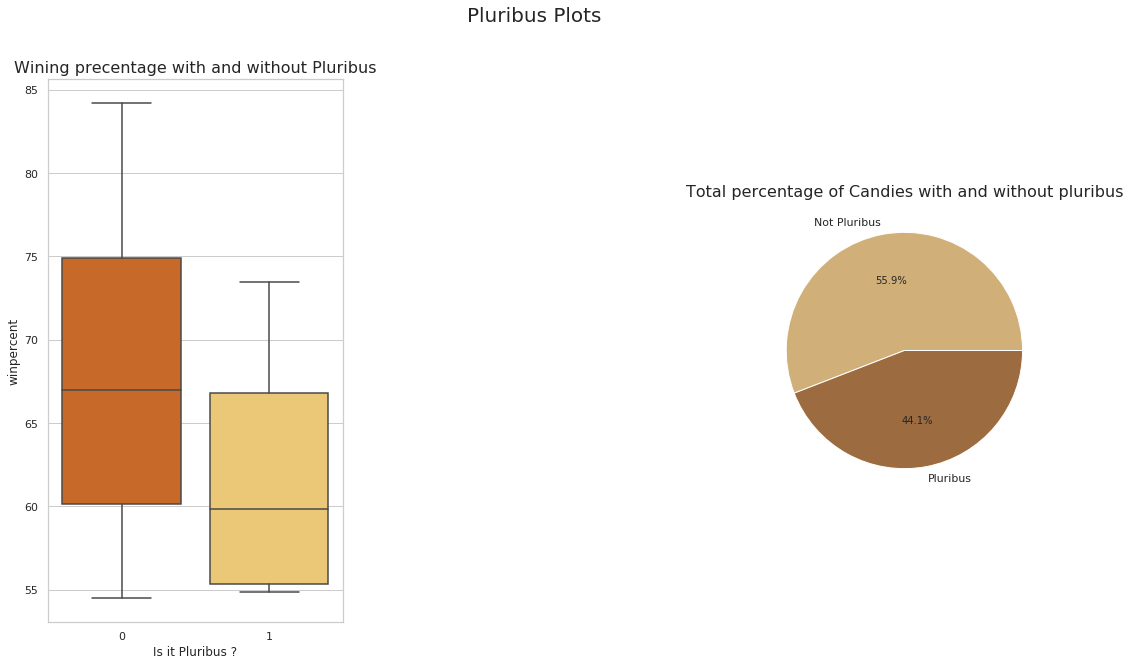

In [ ]:
plt.figure(figsize=(18,10))
plt.suptitle("Pluribus Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Pluribus",fontsize=16)
sns.boxplot(data=winners,x="pluribus",y="winpercent",palette="YlOrBr_r")
plt.xlabel("Is it Pluribus ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without pluribus",fontsize=16)
plt.pie(winners.pluribus.value_counts(), autopct='%1.1f%%',colors=["#D0B078","#9C6B40"],labels=["Not Pluribus","Pluribus"])

Observations:
From the above plot we can say that pluribus is not very good for winning. Best score is close to 75.
It is common in the candy business.

#### Bivariate analysis

#### Sugarpercent

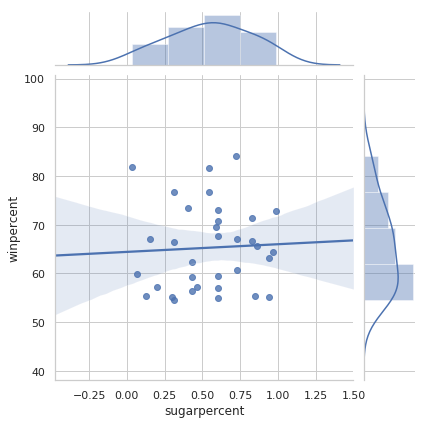

In [ ]:
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="reg")


Observations:
From the above plot we can say that the sugar content of candy does not contribute to the pupularity of the candy.


#### Price percent

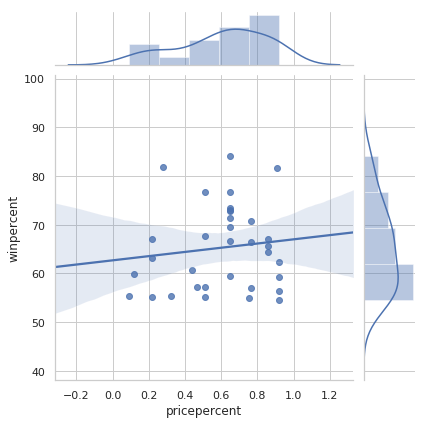

In [ ]:
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="reg")

Observations:
From the above plot we can say that the price of candy does not contribute to the pupularity of the candy.

<a id='section404'></a>
### 4.4 Most Popular and Least Popular Candies

In [ ]:
popularity = candy_data[['competitorname','winpercent']].sort_values(by='winpercent')
popularity.head(5)

,competitorname,winpercent
44,Nik L Nip,22.445
7,Boston Baked Beans,23.418
12,Chiclets,24.525
72,Super Bubble,27.304
26,Jawbusters,28.127


In [ ]:
popularity.tail(5)

,competitorname,winpercent
64,Snickers,76.674
28,Kit Kat,76.769
79,Twix,81.643
51,ReeseÕs Miniatures,81.866
52,ReeseÕs Peanut Butter cup,84.180


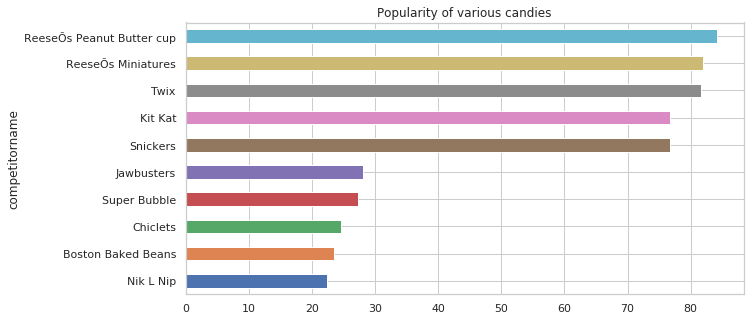

In [ ]:
popularity = candy_data[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

Observations:
The top most popular/winpercent candies are ReeseÕs Peanut Butter cup,ReeseÕs Miniatures, Twix, Kit Kat& Snickers.
The least popular candies are Nik L Nip, Boston Baked Beans, Chiclets, Super Bubble & Jawbusters.

<a id='section405'></a>
### 4.5 Identifying the Components that make a Good Candy

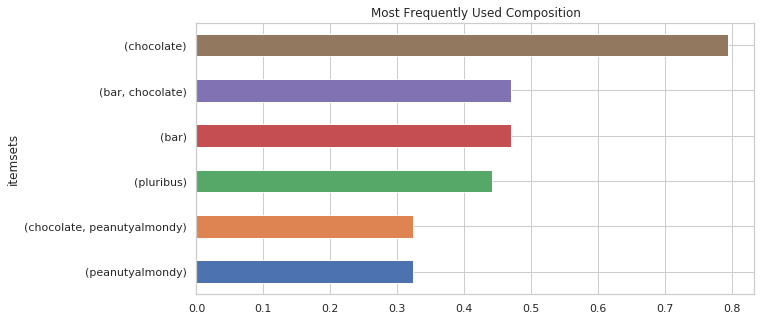

In [ ]:
from mlxtend.frequent_patterns import apriori
df =  winners[candy_data.columns[1:-3]]
association = apriori(df, min_support=0.3,use_colnames=True).sort_values(by='support')


association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used Composition',sort_columns=True,figsize = (10,5),legend=False)

<a id='section406'></a>
### 4.6 Feature Importance of Various Attributes

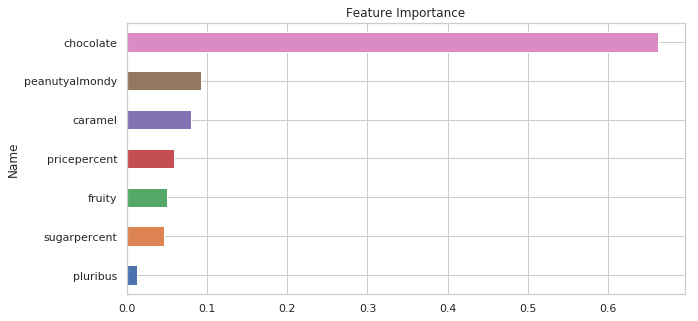

In [ ]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(candy_data[candy_data.columns[1:-1]],candy_data[candy_data.columns[-1]])
imp = pd.DataFrame.from_dict({'Name':candy_data.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

<a id='section5'></a>
### 5. Splitting X and y into training and test datasets.

#### Preparing X and y using pandas

In [ ]:
X = candy_data.loc[:,candy_data.columns [1:-1]]
X.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511


In [ ]:
y = candy_data.winpercent 
y.head()

0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
rmse_err = []

Check the shape of X and y of train and test dataset.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(68, 11)
(68,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(17, 11)
(17,)


<a id='section6'></a>
### 6.Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_reg = LinearRegression().fit(X_train,y_train)
rmse_err.append(np.sqrt(mean_squared_error(y_test,lr_reg.predict(X_test))))
rmse_err[-1]

12.924852701384253

In [ ]:
def lr():
    print('Intercept:',lr_reg.intercept_)                                            
    print('Coefficients:',lr_reg.coef_)
lr()

Intercept: 34.135853487581656
Coefficients: [18.92574149  8.05123581 -3.58660684  8.45199814  7.93393691 15.99803699
 -6.33079399 -4.73599174 -2.81720487 11.43447403 -0.77184126]


 #### Predict the train value using the built model.

In [ ]:
y_pred_train = lr_reg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['winpercent']
    head = pred.head()
    return head
lr()

,winpercent
0,49.716584
1,40.926685
2,41.634620
3,36.276773
4,66.280968


#### Predict the test value using the built model.

In [ ]:
y_pred_test = lr_reg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['winpercent']
    head = pred_test.head()
    return head
lr()

,winpercent
0,55.109480
1,40.869159
2,52.102571
3,59.648041
4,59.076887


<a id='section7'></a>
### 7. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6).fit(X_train,y_train)
rmse_err.append(np.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
rmse_err[-1]

13.559106546254178

 #### Predict the train value using the built model.

In [ ]:
y_pred_train = reg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['winpercent']
    head = pred.head()
    return head
lr()

,winpercent
0,50.550444
1,55.063500
2,42.418556
3,35.202667
4,81.643000


#### Predict the test value using the built model.

In [ ]:
y_pred_test = reg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['winpercent']
    head = pred_test.head()
    return head
lr()

,winpercent
0,61.138667
1,42.418556
2,50.550444
3,50.550444
4,61.138667


<a id='section8'></a>
### 8. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=125).fit(X_train,y_train)
rmse_err.append(np.sqrt(mean_squared_error(y_test,rf_reg.predict(X_test))))
rmse_err[-1]

12.741095954256782

<a id='section9'></a>
### 9. Model Evaluation


<a id='section901'></a>
### 9.1 Root mean squared error.

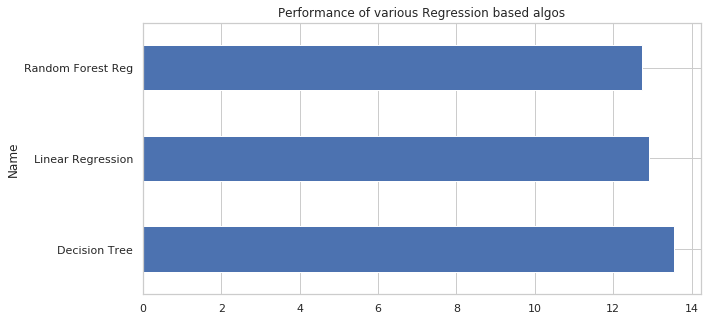

In [ ]:
# initialize list of lists 
data = {'Name':['Linear Regression','Decision Tree','Random Forest Reg'], 'RMSE':[12.924871728728334, 13.559106546254178, 12.741095954256782]}
  
# Create the pandas DataFrame 
models= pd.DataFrame(data).sort_values(by='RMSE',ascending=False)
  
# print dataframe. 
models.plot(x='Name',y='RMSE',kind='barh',sort_columns=True,figsize = (10,5),legend=False,title='Performance of various Regression based algos') 

Inference:
From the above plot we saw that the RMSE value for Random Forest Regressor is the least compared to the other two regression algos.


<a id='section902'></a>
### 9.2 R-squared and Adjusted R-squared

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_reg = LinearRegression().fit(X_train,y_train)
yhat = lr_reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model1',r_squared, adjusted_r_squared)

Model1 0.5855129919383147 0.5040959010690551


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6).fit(X_train,y_train)
yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model2',r_squared, adjusted_r_squared)

Model2 0.9214810923504617 0.906057735490731


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=125).fit(X_train,y_train)
yhat = rf_reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Model3',r_squared, adjusted_r_squared)

Model3 0.9167856180272164 0.900439935853991


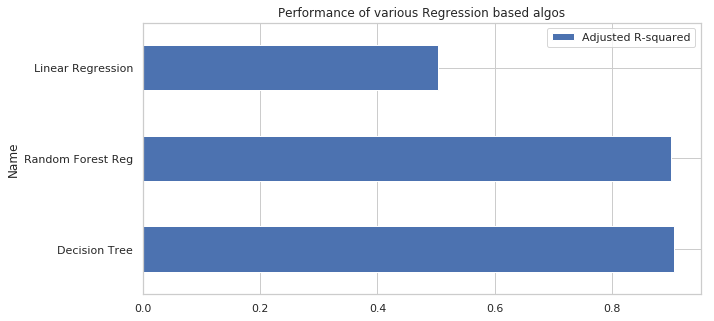

In [ ]:
# initialize list of lists 
data = {'Name':['Linear Regression','Decision Tree','Random Forest Reg'], 'Adjusted R-squared':[0.5040959010690551, 0.906057735490731, 0.900439935853991]}
  
# Create the pandas DataFrame 
models= pd.DataFrame(data).sort_values(by='Adjusted R-squared',ascending=False)
  
# print dataframe. 
models.plot(x='Name',y='Adjusted R-squared',kind='barh',sort_columns=True,figsize = (10,5),legend=True,title='Performance of various Regression based algos')

Inference:
From the above plot we observe that 90% of the variation in data a is explained by both the Random Forest and Decision tree models.


<a id='section903'></a>
### 9.3 Mean Absolute Error

In [ ]:
y_predict1=lr_reg.predict(X_test)
df=pd.DataFrame(data=[y_predict1,y_test])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae=mean_absolute_error(y_test,y_predict1)
mse=mean_squared_error(y_test,y_predict1)
print ('MAE1:',mae)
print ('MSE1:',mse)

MAE1: 10.464152742303979
MSE1: 167.05181735247982


In [ ]:
reg = DecisionTreeRegressor(max_depth=6).fit(X_train,y_train)
y_predict2=reg.predict(X_test)
df=pd.DataFrame(data=[y_predict2,y_test])
mae=mean_absolute_error(y_test,y_predict2)
mse=mean_squared_error(y_test,y_predict2)
print ('MAE2:',mae)
print ('MSE2:',mse)

MAE2: 11.42488791911765
MSE2: 198.44806471767498


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=125).fit(X_train,y_train)
y_predict3=rf_reg.predict(X_test)
df=pd.DataFrame(data=[y_predict3,y_test])
mae=mean_absolute_error(y_test,y_predict3)
mse=mean_squared_error(y_test,y_predict3)
print ('MAE3:',mae)
print ('MSE3:',mse)

MAE3: 10.310102389741173
MSE3: 166.95379560889467


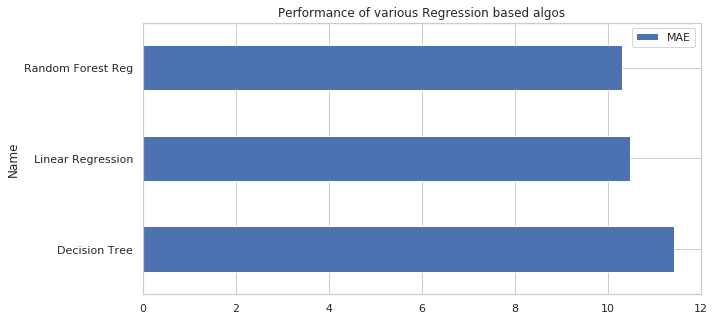

In [ ]:
# initialize list of lists 
data = {'Name':['Linear Regression','Decision Tree','Random Forest Reg'], 'MAE':[10.464152742303979, 11.42488791911765, 10.310102389741173]}
  
# Create the pandas DataFrame 
models= pd.DataFrame(data).sort_values(by='MAE',ascending=False)
  
# print dataframe. 
models.plot(x='Name',y='MAE',kind='barh',sort_columns=True,figsize = (10,5),legend=True,title='Performance of various Regression based algos')

Inference:

The above plot shows that the Random Forest Regression model once again has the minimum Mean Absolute Error.

<a id='section904'></a>
### 9.4 Mean Squared Error

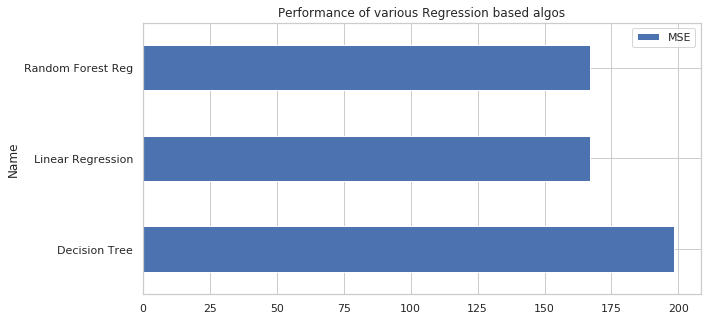

In [ ]:
# initialize list of lists 
data = {'Name':['Linear Regression','Decision Tree','Random Forest Reg'], 'MSE':[167.05181735247982, 198.44806471767498, 166.95379560889467]}
  
# Create the pandas DataFrame 
models= pd.DataFrame(data).sort_values(by='MSE',ascending=False)
  
# print dataframe. 
models.plot(x='Name',y='MSE',kind='barh',sort_columns=True,figsize = (10,5),legend=True,title='Performance of various Regression based algos')

Inference:

From the plot we observe that Random Forest Regressor and Linear regression models both performs similarly in terms of mean squared error.

<a id='section10'></a>
### 10. Conclusions

We have built and compared the performance of three models using various model evaluation metrics.
The performance of the three models using different regressor algorithims based on various model evaluation metrics are shown below:

|   | MAE  | MSE  |  RMSE |  R2 |Adj. R2   |
| ------------ | ------------ | ------------ | ------------ | ------------ | ------------ |
|LR   | 10.464152742303979  |  167.05181735247982 | 12.924871728728334  | 0.5855129919383147  | 0.5040959010690551  |
|DT  | 11.42488791911765  | 198.44806471767498  | 13.559106546254178  |  0.9214810923504617 |  0.906057735490731 |
|RF   |10.310102389741173   | 166.95379560889467  | 12.741095954256782  |0.9167856180272164   |0.900439935853991   |

Our Objective is to minimize the prediction errors so that the model predicts more accurately. Therefore,among the various regression metrics, we give more importance to RMSE.

As RMSE value of Random Forest Model is the least compared to models built with Linear Regression and Decision Tree, the Random Forest model is most preferable.